РОЗРАХУНОВО-ГРАФІЧНА РОБОТА
з дисципліни «Штучні нейронні мережі та машинне навчання» 
на тему: «Use Keras models with Scikit-Learn for binary classification problem»


Виконала студентка групи АД-181 
Рогачова Вікторія

Варіант №18


У даній розрахунково-графічній роботі використовується набір даних відтоку телекомунікацій "
bigml_59c28831336c6604c800002a.csv". Датасет зберігає категоріальні та числові дані. 

Нижче перелічен 21 атрибут набору даних:
1. state 	
2. account length 	
3. area code 	
4. phone number 	
5. international plan 	
6. voice mail plan 	
7. number vmail messages 
8. total day minutes 	
9. total day calls 
10. total day charge 	
11. total eve minutes 	
12. total eve calls 	
13. total eve charge 	
14. total night minutes 	
15. total night calls 	
16. total night charge 	
17. total intl minutes 	
18. total intl calls 	
19. total intl charge 	
20. customer service calls 	
21. churn


Нижче наведено зразок даних датасету, що показує перші 5 рядків з 3333 записів:
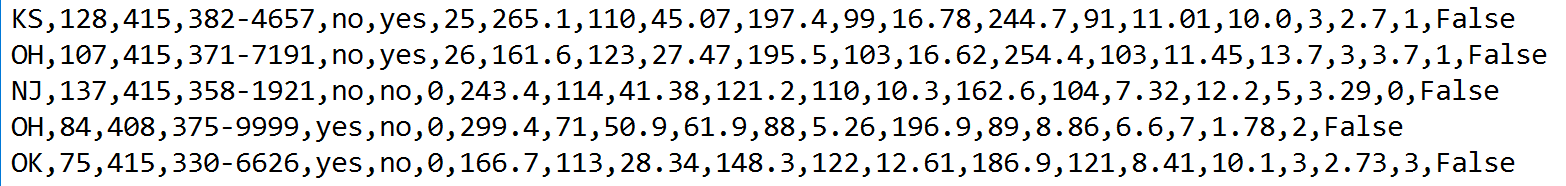

Перед початком роботи імпортуємо необхідні біліотеки.

In [2]:
import numpy as np
import pandas as pd
import os

from keras.layers import Dense
from keras.models import Sequential

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

Виконуємо підключення до Google Drive та зчитуємо дані у датафрейм за допомогою засобів бібліотеки Pandas.

In [4]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bigml.csv')
dataframe.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Виводимо детальну інформацію про всі властивості датасету, використовуючи функцію info().

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Виводимо кількість унікальних назв штатів у датафреймі за допомогою функції len().

In [6]:
len(dataframe['state'].unique())

51

Обираємо 10 штатів відповідно до варіанту та виводимо їхні назви.

In [7]:
dataframe['state'].unique()[36:46]

array(['CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY', 'ME'],
      dtype=object)

Обираємо з оригінального датасету частину відповідно до штатів, утворивши новий датафрейм.

In [8]:
data = dataframe[((dataframe['state']=='CA') | (dataframe['state']=='MN') | 
          (dataframe['state']=='SD')| (dataframe['state']=='NC')| 
          (dataframe['state']=='WA')| (dataframe['state']=='NM')|
          (dataframe['state']=='NV')| (dataframe['state']=='DC')|
          (dataframe['state']=='KY')| (dataframe['state']=='ME'))]
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
61,CA,116,415,405-3371,no,yes,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2,False
62,MN,74,510,344-5117,no,yes,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False
63,SD,149,408,332-8160,no,yes,28,180.7,92,30.72,187.8,64,15.96,265.5,53,11.95,12.6,3,3.40,3,False
64,NC,38,408,359-4081,no,no,0,131.2,98,22.30,162.9,97,13.85,159.0,106,7.15,8.2,6,2.21,2,False
65,WA,40,415,352-8305,no,yes,41,148.1,74,25.18,169.5,88,14.41,214.1,102,9.63,6.2,5,1.67,2,False


Виводимо розмір отриманого датафрейму за допомогою властивості shape.

In [9]:
data.shape

(615, 21)

Створюємо lambda-функції для перетворення значень стовпців international plan, 	voice mail plan та churn у бінарний формат.

In [10]:
f1 = lambda x:1 if x == 'yes' else 0

In [11]:
f2 = lambda x:1 if x == 'True' else 0

Використовуючи метод map та реалізовану функцію, виконуєо перетворення значень стовпців international plan, 	voice mail plan та churn.

In [12]:
data['international plan'] = data['international plan'].map(f1)
data['voice mail plan'] = data['voice mail plan'].map(f1)
data['churn'] = data['churn'].map(f2)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
61,CA,116,415,405-3371,0,1,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2,0
62,MN,74,510,344-5117,0,1,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,0
63,SD,149,408,332-8160,0,1,28,180.7,92,30.72,187.8,64,15.96,265.5,53,11.95,12.6,3,3.40,3,0
64,NC,38,408,359-4081,0,0,0,131.2,98,22.30,162.9,97,13.85,159.0,106,7.15,8.2,6,2.21,2,0
65,WA,40,415,352-8305,0,1,41,148.1,74,25.18,169.5,88,14.41,214.1,102,9.63,6.2,5,1.67,2,0


Після цього видаляємо зайві стовпці  international plan, 	voice mail plan та churn, зберігаючи дані окремо.

In [13]:
data_int_plan = data.pop('international plan')
data_int_plan

61      0
62      0
63      0
64      0
65      0
       ..
3297    0
3299    0
3301    0
3315    0
3317    1
Name: international plan, Length: 615, dtype: int64

In [14]:
data_voice_plan = data.pop('voice mail plan')
data_voice_plan

61      1
62      1
63      1
64      0
65      1
       ..
3297    1
3299    0
3301    0
3315    1
3317    0
Name: voice mail plan, Length: 615, dtype: int64

In [15]:
data_churn = data.pop('churn')
data_churn

61      0
62      0
63      0
64      0
65      0
       ..
3297    0
3299    0
3301    0
3315    0
3317    0
Name: churn, Length: 615, dtype: int64

Перевіряємо утворений набір даних, який можна розділити на вхідні (X) та вихідні (y) змінні.

In [16]:
data.head()

,state,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
61,CA,116,415,405-3371,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2
62,MN,74,510,344-5117,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2
63,SD,149,408,332-8160,28,180.7,92,30.72,187.8,64,15.96,265.5,53,11.95,12.6,3,3.40,3
64,NC,38,408,359-4081,0,131.2,98,22.30,162.9,97,13.85,159.0,106,7.15,8.2,6,2.21,2
65,WA,40,415,352-8305,41,148.1,74,25.18,169.5,88,14.41,214.1,102,9.63,6.2,5,1.67,2


Створюємо набір значень залежної змінної X на основі значень стовпців з number vmail messages по customer service calls. Змінна y зберігає значення стовпця churn. Виводимо перші 5 рядків X та перші 5 значень y.

In [17]:
X = data.drop(data.loc[:,:'phone number'],axis=1)
X.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
61,34,268.6,83,45.66,178.2,142,15.15,166.3,106,7.48,11.6,3,3.13,2
62,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2
63,28,180.7,92,30.72,187.8,64,15.96,265.5,53,11.95,12.6,3,3.40,3
64,0,131.2,98,22.30,162.9,97,13.85,159.0,106,7.15,8.2,6,2.21,2
65,41,148.1,74,25.18,169.5,88,14.41,214.1,102,9.63,6.2,5,1.67,2


In [18]:
y = data_churn
y.head()

61    0
62    0
63    0
64    0
65    0
Name: churn, dtype: int64

Виводимо розміри утворених наборів даних.

In [19]:
print(X.shape, y.shape)

(615, 14) (615,)


На основі значень X утворюємо Numpy масив.

In [20]:
X_values = X.values
X_values

array([[ 34.  , 268.6 ,  83.  , ...,   3.  ,   3.13,   2.  ],
       [ 33.  , 193.7 ,  91.  , ...,   3.  ,   3.94,   2.  ],
       [ 28.  , 180.7 ,  92.  , ...,   3.  ,   3.4 ,   3.  ],
       ...,
       [  0.  , 280.  , 113.  , ...,   4.  ,   2.81,   0.  ],
       [ 18.  , 148.5 , 106.  , ...,   4.  ,   1.76,   0.  ],
       [  0.  , 197.2 ,  90.  , ...,   8.  ,   2.11,   1.  ]])

Моделі в Keras визначаються як послідовність шарів. Створюється послідовна модель і  шари додаються по одному, поки не задоволені топологією мережі. Ми використовуємо повністю зв’язану структуру мережі. Повністю зв’язані шари визначаються за допомогою класу Dense. Кількість нейронів у шарі вказується як перший аргумент, метод ініціалізації як init і функція активації вказується за допомогою аргументу activation. 

Cтворюємо функцію для формування базової моделі з 1 Dense шаром з кількістю нейронів, що дорівнює четверті кількості вхідних змінних. 

Почнемо з визначення функції, яка створює нашу базову модель. Наша модель матиме один повністю пов’язаний прихований шар з такою же кількістю нейронів як вхідних змінних. 
Вихідний шар містить один нейрон для прогнозування. Він використовує сигмовидну функцію активації для того, щоб отримати вихідні дані ймовірності у діапазоні від 0 до 1, які можна легко й автоматично конвертувати в чіткі значення класу.
Під час навчання ми використовуємо логарифмічну функцію втрат (бінарна кросентропія), бажану функцію втрат для задач двійкової класифікації.
Модель також використовує ефективний алгоритм оптимізації Adam для градієнтного спуску, а показники точності будуть зібрані під час навчання моду.

In [40]:
def create_baseline4():

  model = Sequential()
  model.add(Dense(4, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

  model.compile(loss = 'BinaryCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [27]:
history = create_baseline().fit(
    X_values,y,
    batch_size=128,
    epochs=200,
    verbose = 0
)

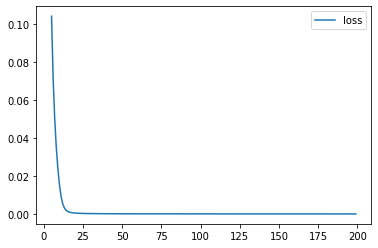

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:,['loss']].plot()

Ми використовуємо scikit-learn, щоб оцінити модель за допомогою стратифікованої k-кратної перехресної перевірки. Це метод повторної дискретизації, який надасть оцінку продуктивності моделі.

K-кратна перехресна перевірка забезпечує надійну оцінку ефективності моделі щодо невидимих даних шляхом поділу навчального набору даних на k підмножин і по черзі навчаючи моделі для всіх підмножин, крім однієї, яка зберігається, та після цього оцінюючи продуктивність моделі на валідаційному датасеті. Процес повторюється доти, доки всім підмножинам не буде надано можливість стати протриманим набором перевірки. Потім показник продуктивності усереднюється для всіх створених моделей.

Щоб використовувати моделі Keras із scikit-learn, ми повинні використовувати обгортку KerasClassifier. Цей клас приймає функцію, яка створює і повертає нашу модель нейронної мережі. Він також приймає аргументи, які передасть виклику fit(), наприклад кількість епох і розмір пакету,

Проводимо оцінку моделі за допомогою stratified cross validation бібліотеки scikit-learn. Для використання Keras з scikit-learn застосовуємо клас KerasClassifier, якому передаємо створену функцію для побудови моделі, кількість епох - 100, розмір виборки - 5.

In [41]:
estimator = KerasClassifier(build_fn = create_baseline, nb_epoch= 100, batch_size = 5, verbose = 0)
kfold = StratifiedKFold(n_splits = 20, shuffle = True, random_state=27)
results = cross_val_score(estimator, X, y, cv=kfold)
print('Baseline: %.2f%% (%.2f%%)' % (results.mean()*100,results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


Baseline: 100.00% (0.00%)


Ефективною схемою підготовки даних для табличних даних при побудові моделей нейронної мережі є стандартизація. Тут дані змінюються таким чином, що середнє значення для кожного атрибута дорівнює 0, а стандартне відхилення дорівнює 1.
Ми можемо використовувати scikit-learn для виконання стандартизації нашого набору даних за допомогою класу StandardScaler.
Замість того, щоб виконувати стандартизацію для всього набору даних, краще тренувати процедуру стандартизації на навчальних даних під час проходження перехресної перевірки та використовувати навчений екземпляр стандартизації для підготовки невидимої тестової складки.
Це робить стандартизацію кроком у підготовці моделі в процесі перехресної перевірки і не дозволяє алгоритму мати знання про невидимі дані під час оцінювання знання, які можуть бути передані зі схеми підготовки даних, як більш чіткий розподіл.
Ми можемо досягти цього в scikit-learn за допомогою класу Pipeline. Pipeline - це обгортка, яка виконує одну або кілька моделей протягом проходу процедури перехресної перевірки. Тут ми можемо визначити конвеєр за допомогою StandardScaler, за яким слідує наша модель нейронної мережі

Проводимо попередню обробку даних за допомогою нормалізації (StandardScaler) для поліпшення якості моделі.

In [34]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn = create_baseline, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
kfold1 = StratifiedKFold(n_splits = 20, shuffle = True, random_state = 27)
results1 = cross_val_score(estimator, X, y, cv = kfold1)
print('Standardized: %.2f%% (%.2f%%)' % (results1.mean()*100,results1.std()*100))

Standardized: 100.00% (0.00%)


Проводимо налаштування архітектури мережі, змінюючи кількість шарів та нейронів: 1) друга мережа - зміна тільки кількостінейронів; 2) третя мережа - додавання шарів нейронів. Проводимо оцінку якості нових мереж за допомогою перехресної перевірки.

In [36]:
def create_baseline2():

  model = Sequential()
  model.add(Dense(8, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

  model.compile(loss = 'BinaryCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [37]:
estimator2 = KerasClassifier(build_fn = create_baseline2, nb_epoch= 100, batch_size = 5, verbose = 0)
kfold2 = StratifiedKFold(n_splits = 20, shuffle = True, random_state=27)
results2 = cross_val_score(estimator2, X, y, cv=kfold2)
print('Model2: %.2f%% (%.2f%%)' % (results2.mean()*100,results2.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


Model2: 100.00% (0.00%)


In [38]:
def create_baseline3():

  model = Sequential()
  model.add(Dense(4, input_dim = 14, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dense(2, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

  model.compile(loss = 'BinaryCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [39]:
estimator3 = KerasClassifier(build_fn = create_baseline3, nb_epoch= 100, batch_size = 5, verbose = 0)
kfold3 = StratifiedKFold(n_splits = 20, shuffle = True, random_state=27)
results3 = cross_val_score(estimator3, X, y, cv=kfold3)
print('Model3: %.2f%% (%.2f%%)' % (results3.mean()*100,results3.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


Model3: 100.00% (0.00%)
